# Resume dataset

The dataset is created by joining three datasets:

- [Resume Entities for NER](https://www.kaggle.com/datasets/dataturks/resume-entities-for-ner)
- [Resume Section Classification](https://huggingface.co/datasets/DevashishBhake/resume_section_classification)
- [Training Data Llama2 Resume Distiller](https://huggingface.co/datasets/gautamsabba/training_data_llama2_resume_distiller).
- [Resume dataset from livecareer.com](https://www.kaggle.com/datasets/snehaanbhawal/resume-dataset)
- [AI Rectruitment Pipeline Dataset](https://www.kaggle.com/datasets/yaswanthkumary/ai-recruitment-pipeline-dataset/data)

This five datasets contain many resumes from different sources, they will be joined in only one dataset for summarizing using OpenAI API.

In [1]:
import os
import re
import json
import kagglehub
import pandas as pd
from collections import defaultdict
from huggingface_hub import login
from datasets import load_dataset

In [2]:
login()

In [3]:
# resume Entities for NER dataset from kaggle
path = kagglehub.dataset_download("dataturks/resume-entities-for-ner")
# functions by K Scott Mader in https://www.kaggle.com/code/kmader/finding-good-parts-of-resumes/notebook
base_json = path + '/Entity Recognition in Resumes.json'
def pop_annot(raw_line):
    in_line = defaultdict(list, **raw_line)
    if 'annotation' in in_line:
        labels = in_line['annotation']
        for c_lab in labels:
            if len(c_lab['label'])>0:
                in_line[c_lab['label'][0]] += c_lab['points']
    return in_line
with open(base_json, 'r') as f:
    # data is jsonl and so we parse it line-by-line
    resume_data = [json.loads(f_line) for f_line in f.readlines()]
    df1 = pd.DataFrame([pop_annot(line) for line in resume_data])

In [4]:
def remove_indeed_links(text):
    # Regex pattern to match URLs ending in "=IN"
    pattern = r"https?://www\.indeed\.com/r/[\w-]+/\w+\?[^\s]*"
    return re.sub(pattern, "", text).strip()

df1['content'] = df1['content'].map(remove_indeed_links)

In [5]:
with pd.option_context('display.max_colwidth', None):
    print(df1.content.head(1))

0    Abhishek Jha\nApplication Development Associate - Accenture\n\nBengaluru, Karnataka - Email me on Indeed: indeed.com/r/Abhishek-Jha/10e7a8cb732bc43a\n\n• To work for an organization which provides me the opportunity to improve my skills\nand knowledge for my individual and company's growth in best possible ways.\n\nWilling to relocate to: Bangalore, Karnataka\n\nWORK EXPERIENCE\n\nApplication Development Associate\n\nAccenture -\n\nNovember 2017 to Present\n\nRole: Currently working on Chat-bot. Developing Backend Oracle PeopleSoft Queries\nfor the Bot which will be triggered based on given input. Also, Training the bot for different possible\nutterances (Both positive and negative), which will be given as\ninput by the user.\n\nEDUCATION\n\nB.E in Information science and engineering\n\nB.v.b college of engineering and technology -  Hubli, Karnataka\n\nAugust 2013 to June 2017\n\n12th in Mathematics\n\nWoodbine modern school\n\nApril 2011 to March 2013\n\n10th\n\nKendriya Vidyalay

In [6]:
df2 = load_dataset('DevashishBhake/resume_section_classification', split='train').to_pandas()

In [7]:
with pd.option_context('display.max_colwidth', None):
    print(df2.Resume.head(1))

0    b'John H. Smith, P.H.R.\n800-991-5187 | PO Box 1673 | Callahan, FL 32011 | info@greatresumesfast.com\n\nApproachable innovator with a passion for Human Resources.\n\nSENIOR HUMAN RESOURCES PROFESSIONAL\nPersonable, analytical, flexible Senior HR Professional with multifaceted expertise. Seasoned Benefits Administrator with\nextensive experience working with highly paid professionals in client-relationship-based settings. Dynamic team leader\ncapable of analyzing alternatives and identifying tough choices while communicating the total value of benefit and\ncompensation packages to senior level executives and employees.\n\nCORE COMPETENCIES\nBenefits Administration \xe2\x80\x93 Customer Service \xe2\x80\x93 Cost Control \xe2\x80\x93 Recruiting \xe2\x80\x93 Acquisition Management \xe2\x80\x93 Compliance Reporting\nRetention \xe2\x80\x93 Professional Services \xe2\x80\x93 Domestic & International Benefits \xe2\x80\x93 Collaboration \xe2\x80\x93 Adaptability \xe2\x80\x93 Change Managem

In [8]:
df3_1 = load_dataset('gautamsabba/training_data_llama2_resume_distiller', split='train').to_pandas()
df3_2 = load_dataset('gautamsabba/training_data_llama2_resume_distiller', split='test').to_pandas()

Repo card metadata block was not found. Setting CardData to empty.
Repo card metadata block was not found. Setting CardData to empty.


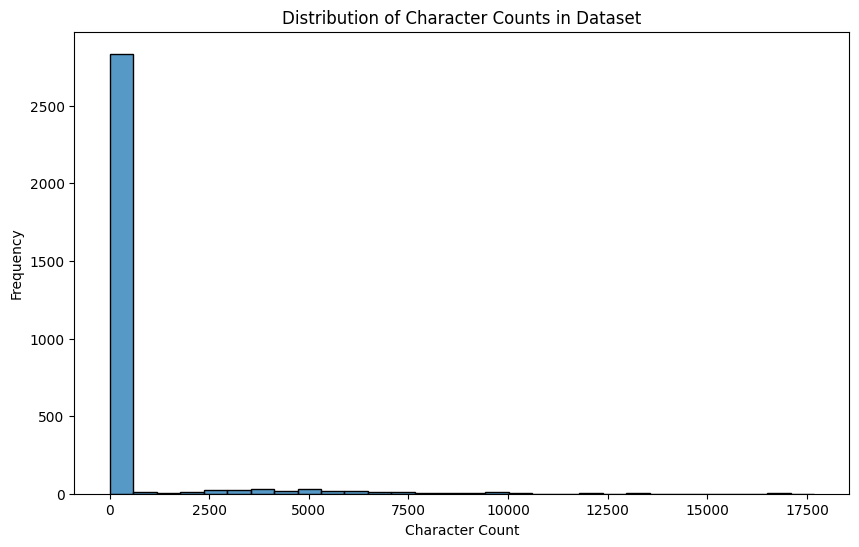

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

df3_1['char_count'] = df3_1['text'].str.len()
df3_2['char_count'] = df3_2['text'].str.len()

plt.figure(figsize=(10, 6))
sns.histplot(df3_1['char_count'], bins=30)
plt.xlabel("Character Count")
plt.ylabel("Frequency")
plt.title("Distribution of Character Counts in Dataset")
plt.show()

Most resumes are probably between 2000 characters and 8000 (the other are lines where the resume is mixed with something else).

In [10]:
df3_a = df3_1[(df3_1['char_count'] > 1500) & (df3_1['char_count'] < 10000)]
df3_b = df3_2[(df3_2['char_count'] > 1500) & (df3_2['char_count'] < 10000)]
df3 = pd.concat([df3_a, df3_b], ignore_index=True)

In [11]:
with pd.option_context('display.max_colwidth', None):
    print(df3.text.head(1))

0    Vamsi Krishna Kondapuneni Senior Information Security Analyst As an experienced cybersecurity professional with around 7 years of Contact handson experience have expertise in implementing security solutions such as firewalls VPNs and SIEM tools Performed security assessments Address identified vulnerabilities and recommended remediation strategies Lewisville Texas 75067 while maintaining a focus on GRC including policy development and Phone compliance auditing Pursued relevant certifications and regularly 4698770742 attend industry events which enables to stay current with the latest Email trends and technologies As a committed and resultsdriven vk245@outlookcom cybersecurity professional thrive in fastpaced environments and able to adapt quickly to new challenges and emerging threats LinkedIn wwwlinkedincominvamsi krishnakondapuneni Work History WWW Lead Security Analyst 202201  httpszetycomprofileva 202302 msikrishna133 Société Générale New York NY  Conducted risk assessments fo

In [12]:
path = kagglehub.dataset_download("snehaanbhawal/resume-dataset")
print(path)

/Users/juanbeiroa/.cache/kagglehub/datasets/snehaanbhawal/resume-dataset/versions/1


In [13]:
file = path + '/Resume/Resume.csv'
df4 = pd.read_csv(file)

In [14]:
with pd.option_context('display.max_colwidth', None):
    print(df4.Resume_str.head(1))

0             HR ADMINISTRATOR/MARKETING ASSOCIATE\n\nHR ADMINISTRATOR       Summary     Dedicated Customer Service Manager with 15+ years of experience in Hospitality and Customer Service Management.   Respected builder and leader of customer-focused teams; strives to instill a shared, enthusiastic commitment to customer service.         Highlights         Focused on customer satisfaction  Team management  Marketing savvy  Conflict resolution techniques     Training and development  Skilled multi-tasker  Client relations specialist           Accomplishments      Missouri DOT Supervisor Training Certification  Certified by IHG in Customer Loyalty and Marketing by Segment   Hilton Worldwide General Manager Training Certification  Accomplished Trainer for cross server hospitality systems such as    Hilton OnQ  ,   Micros    Opera PMS   , Fidelio    OPERA    Reservation System (ORS) ,   Holidex    Completed courses and seminars in customer service, sales strategies, inventory control, los

In [15]:
df1.columns

Index(['content', 'annotation', 'extras', 'Skills', 'College Name',
       'Graduation Year', 'Designation', 'Companies worked at',
       'Email Address', 'Location', 'Name', 'Degree', 'Years of Experience',
       'UNKNOWN'],
      dtype='object')

In [16]:
df2.columns

Index(['ID', 'Category', 'Resume'], dtype='object')

In [17]:
df3.columns

Index(['text', 'char_count'], dtype='object')

In [18]:
df4.columns

Index(['ID', 'Resume_str', 'Resume_html', 'Category'], dtype='object')

In [19]:
path = kagglehub.dataset_download("yaswanthkumary/ai-recruitment-pipeline-dataset")
print("Path to dataset files:", path)

Path to dataset files: /Users/juanbeiroa/.cache/kagglehub/datasets/yaswanthkumary/ai-recruitment-pipeline-dataset/versions/1


In [20]:
file = path + '/dataset.csv'
df5 = pd.read_csv(file)
df5.columns

Index(['ID', 'Name', 'Role', 'Transcript', 'Resume', 'decision',
       'Reason_for_decision', 'Job_Description'],
      dtype='object')

In [21]:
import re

df5['Resume'] = df5['Resume'].str.replace(
    r"^Here's .*? resume for .*?: ?", "", regex=True
)

In [22]:
df5.Resume

0        \n\nJason Jones\nE-commerce Specialist\n\nCont...
1        \n\nAnn Marshall\nContact Information:\n\n* Em...
2        \n\nPatrick Mcclain\nHuman Resources Specialis...
3        \n\nPatricia Gray\nContact Information:\n\n* E...
4        \n\nAmanda Gross\nContact Information:\n\n* Em...
                               ...                        
10169    \n\n**Diana Miller**\n**Contact Information:**...
10170    \n\n**Grace Taylor**\n\n**Contact Information:...
10171    \n\n**Hank Brown**\n**UI Engineer**\n\n**Conta...
10172    \n\n**Diana Wilson**\n**Contact Information:**...
10173    \n\n**Charlie Miller**\n**Contact Information:...
Name: Resume, Length: 10174, dtype: object

In [23]:
with pd.option_context('display.max_colwidth', None):
    print(df5.Resume.head(1))

0    \n\nJason Jones\nE-commerce Specialist\n\nContact Information:\n\n* Email: [jasonjones@email.com](mailto:jasonjones@email.com)\n* Phone: 555-123-4567\n* LinkedIn: linkedin.com/in/jasonjones\n\nSummary:\nResults-driven E-commerce Specialist with 5+ years of experience in inventory management, SEO, online advertising, and analytics. Proven track record of increasing online sales, improving website traffic, and optimizing inventory levels. Skilled in analyzing complex data sets, identifying trends, and making data-driven decisions. Passionate about staying up-to-date with the latest e-commerce trends and technologies.\n\nProfessional Experience:\n\nE-commerce Specialist, XYZ Corporation (2018-Present)\n\n* Managed inventory levels across multiple channels, resulting in a 25% reduction in stockouts and a 15% reduction in overstocking\n* Developed and implemented SEO strategies that increased website traffic by 30% and improved search engine rankings by 20%\n* Created and executed onli

In [24]:
df = pd.concat([df1.content, df2.Resume, df3.text, df4.Resume_str, df5.Resume], ignore_index=True)
df

0        Abhishek Jha\nApplication Development Associat...
1        Afreen Jamadar\nActive member of IIIT Committe...
2        Akhil Yadav Polemaina\nHyderabad, Telangana - ...
3        Alok Khandai\nOperational Analyst (SQL DBA) En...
4        Ananya Chavan\nlecturer - oracle tutorials\n\n...
                               ...                        
14500    \n\n**Diana Miller**\n**Contact Information:**...
14501    \n\n**Grace Taylor**\n\n**Contact Information:...
14502    \n\n**Hank Brown**\n**UI Engineer**\n\n**Conta...
14503    \n\n**Diana Wilson**\n**Contact Information:**...
14504    \n\n**Charlie Miller**\n**Contact Information:...
Length: 14505, dtype: object

In [25]:
data = pd.DataFrame(df, columns=["Resume"])

In [26]:
with pd.option_context('display.max_colwidth', None):
    print(data.tail(1))

In [27]:
def clean_resume(text):
    if isinstance(text, bytes):
        text = text.decode("utf-8", errors="ignore")
    if not isinstance(text, str):
        return ""

    text = text.replace("\\n", "\n")         # literal \n
    text = text.replace("\n", " ")           # normalize newlines
    text = text.replace("\r", " ")           # remove carriage returns
    text = text.encode("ascii", "ignore").decode()  # remove non-ASCII
    text = ' '.join(text.split())            # remove excess whitespace
    return text.strip()

data["Resume"] = data["Resume"].apply(clean_resume)

# Summarizing resumes with OpenAI

In [28]:
def create_prompt(resume_text):
    return (
        "Summarize the following resume in 3-4 sentences, focusing on key skills, experience, and education.\n\n"
        f"Resume:\n{resume_text}"
    )

data["prompt"] = data["Resume"].apply(create_prompt)

In [35]:
# extract 5 for few shot prompt
extract = data.Resume.sample(5, random_state=42)
data.drop(extract.index, inplace=True)

In [36]:
for i in range(len(extract)):
    with pd.option_context('display.max_colwidth', None):
        print(extract.iloc[i])
        print('\n\n*****\n\n')

Laura Le Contact Information: * Address: 123 Main St, Anytown, USA 12345 * Phone: (123) 456-7890 * Email: [laurale@email.com](mailto:laurale@email.com) * LinkedIn: linkedin.com/in/laurale Professional Summary: Results-driven Business Analyst with 5+ years of experience in gathering requirements, analyzing data, and presenting findings to stakeholders. Proven track record of improving business processes and increasing efficiency through data-driven insights. Skilled in SQL, data analysis, and problem-solving, with excellent communication and presentation skills. Technical Skills: * SQL (MS SQL Server, MySQL) * Data Analysis (Tableau, Power BI) * Presentation (Microsoft Office, Google Slides) * Problem-Solving (Root Cause Analysis, Six Sigma) * Business Intelligence Tools (Power BI, Tableau) * Data Visualization (D3.js, Highcharts) Professional Experience: Business Analyst, ABC Corporation (2018-Present) * Gathered and documented business requirements through stakeholder interviews, surv

In [37]:
summaries = [
    """Laura Le resides at 123 Main St, Anytown, USA. She holds an MBA from XYZ University and a BS in Computer Science from ABC University. 
She currently works as a Business Analyst at ABC Corporation where she gathers requirements, analyzes data, and supports business decisions. 
Her key achievements include improving sales forecasting accuracy and developing business dashboards. 
Laura is proficient in SQL, Tableau, Power BI, and data visualization libraries such as D3.js. 
She is recognized for enhancing business efficiency and productivity. References available upon request.""",

    """Faye H. Harrison, based in Buffalo, NY, is seeking a Sales Manager role in a Florida Walmart Supercenter. 
She holds a BA in Business Management from the University of Phoenix. 
Faye has over 13 years of retail experience, including roles as sales manager at Bloomingdale’s and assistant sales manager at Glendale Mall. 
She has managed teams, implemented promotional strategies, and analyzed sales data. 
She is bilingual in English and Spanish and is skilled in customer service, inventory oversight, and team leadership. 
References available upon request.""",

    """Meagan Barnett is a QA Engineer with a BS in Computer Science from XYZ University and certifications from ISTQB. 
She currently works at ABC Corporation and previously worked at DEF Startups. 
Her responsibilities include test planning, automation using Selenium and Appium, and defect tracking. 
She has successfully reduced defect densities and improved testing efficiency. 
Her skills include TestNG, JIRA, Git, and both web and mobile testing. 
She has been recognized for her contributions to QA practices and has spoken at industry events. References available upon request.""",

    """Sherry Davis is a QA Engineer with a Bachelor's Degree in Computer Science from XYZ University and certifications in ISTQB and Scrum. 
She has experience at ABC Corporation and DEF Solutions performing functional and performance testing, using tools like JIRA, LoadRunner, and Git. 
Sherry specializes in Agile QA processes, bug tracking, and automated testing frameworks. 
She has been recognized for reducing defect density and leading test automation initiatives. 
References available upon request.""",

    """Dr. Rahman is a public health consultant with an MBBS from the University of Dhaka and an MPH from George Washington University. 
She has worked on child nutrition, maternal health, arsenicosis awareness, and eclampsia reduction programs in Bangladesh, often in collaboration with UNICEF and WHO. 
Her skills include community outreach, health education, and program evaluation. 
She has experience in organizing mass awareness campaigns and delivering field health services. 
She is highly committed to improving public health outcomes through education and direct service."""
]

In [38]:
few_shot = pd.DataFrame(extract)
few_shot["summaries"] = summaries
few_shot

,Resume,summaries
11755,Laura Le Contact Information: * Address: 123 M...,"Laura Le resides at 123 Main St, Anytown, USA...."
837,b'Wal-Mart Sales Manager CV Template Faye H. H...,"Faye H. Harrison, based in Buffalo, NY, is see..."
9561,Meagan Barnett Contact Information: * Phone: (...,Meagan Barnett is a QA Engineer with a BS in C...
10275,Sherry Davis QA Engineer Contact Information: ...,Sherry Davis is a QA Engineer with a Bachelor'...
3015,"CONSULTANT Education and Training 2016 MPH, Ge...",Dr. Rahman is a public health consultant with ...


In [74]:
def build_few_shot_prompt(df, target_resume, num_examples=3):
    """
    Build a few-shot prompt for resume summarization using prior examples.

    Parameters:
        df (pd.DataFrame): DataFrame with 'Resume' and 'summaries' columns.
        target_resume (str): The resume text to summarize.
        num_examples (int): Number of few-shot examples to include.

    Returns:
        List[Dict]: Messages formatted for OpenAI ChatCompletion.
    """

    # System message to set the context
    messages = [{
        "role": "system",
        "content": (
            "You are an expert in resume summarization. "
            "For each resume, output a structured summary using markdown headings. "
            "Divide the summary into five sections: Personal/Contact Information, Education, "
            "Experience, Skills, and Other Relevant Information. Keep each section to 2–3 sentences."
            "Keep the total output under 400 tokens."
        )
    }]

    # Select random few-shot examples from the dataset
    examples = df.sample(n=num_examples, random_state=42)

    for _, row in examples.iterrows():
        resume_text = row["Resume"]
        summary_text = row["summaries"]

        messages.append({"role": "user", "content": f"Resume:\n{resume_text}"})
        messages.append({"role": "assistant", "content": summary_text})

    # Add the target resume as the user input
    messages.append({"role": "user", "content": f"Resume:\n{target_resume}"})

    return messages

In [40]:
build_few_shot_prompt(few_shot, data.Resume.sample(1).values[0])

[{'role': 'system',
  'content': 'You are an expert in resume summarization. For each resume, output a structured summary using markdown headings. Divide the summary into five sections: Personal/Contact Information, Education, Experience, Skills, and Other Relevant Information. Keep each section to 2–3 sentences.'},
 {'role': 'user',
  'content': "Resume:\nb'Wal-Mart Sales Manager CV Template Faye H. Harrison Porter Ave., Buffalo, NY Phone: (718) 667-5983 xxxxxx@gmail.com Objective To work as a Wal-Mart Sales Manager at its Supercenter in Florida Summary of Qualification \\xef\\x82\\xb7 13 years of experience in the retail business with the last 4 years as a sales manager for a large consumer retail store \\xef\\x82\\xb7 Excellent verbal and written communication skills in English and Spanish \\xef\\x82\\xb7 Excellent social and interpersonal skills Career Experience/Job History 2006 \\xe2\\x80\\x93 Present: Retail Sales Manager, Bloomingdale\\xe2\\x80\\x99s, NY \\xef\\x82\\xb7 Impleme

In [49]:
import openai

client = openai.OpenAI(
    api_key=os.getenv("OPENAI_RESUME_SUMMARIES_KEY")
)

In [50]:
def test_models_on_resume(resume_text, df_fewshot, models=("gpt-4o-mini", "gpt-3.5-turbo")):
    results = {}

    for model in models:
        try:
            print(f"\n🔍 Testing model: {model}")
            messages = build_few_shot_prompt(df_fewshot, target_resume=resume_text, num_examples=2)

            response = client.chat.completions.create(
                model=model,
                messages=messages,
                temperature=0.7
            )

            summary = response.choices[0].message.content
            results[model] = summary
            print(f"[✓] Summary from {model}:\n")
            print(summary)
            print("-" * 60)

        except Exception as e:
            results[model] = f"Error: {str(e)}"
            print(f"[!] Error with model {model}: {e}")

    return results

In [51]:
df_fewshot = few_shot.sample(n=2, random_state=42)
test_resume_text = data.sample(n=1, random_state=24)["Resume"].values[0]

##### results = test_models_on_resume(test_resume_text, df_fewshot)

In [54]:
def estimate_costs_per_resume(input_tokens=2000, output_tokens=500):
    cost = {
        "gpt-4o-mini":  (input_tokens / 1000 * 0.0005) + (output_tokens / 1000 * 0.0015),
        "gpt-3.5-turbo":(input_tokens / 1000 * 0.0015) + (output_tokens / 1000 * 0.002)
    }
    return {k: round(v, 5) for k, v in cost.items()}

In [57]:
import tiktoken

def count_tokens_from_messages(messages, model="gpt-4o-mini"):
    """Estimate the number of tokens used by a list of chat messages."""
    encoding = tiktoken.encoding_for_model(model)

    # Token rules from OpenAI guidelines:
    # Each message: <role/name> <content> => 4 tokens overhead
    num_tokens = 0
    for message in messages:
        num_tokens += 4  # role + structure
        for key, value in message.items():
            num_tokens += len(encoding.encode(value))
    num_tokens += 2  # assistant reply priming
    return num_tokens

In [60]:
total_tokens = 0
models = ('gpt-4o-mini', 'gpt-3.5-turbo')

for mod in models:
    total_tokens = 0
    for i, row in data.iterrows():
        resume_text = row["Resume"]
        messages = build_few_shot_prompt(df_fewshot, target_resume=resume_text, num_examples=2)
        tokens = count_tokens_from_messages(messages, model=mod)
        total_tokens += tokens
    print(f"Estimated total input tokens for {mod}: {total_tokens:,}")

Estimated total input tokens for gpt-4o-mini: 33,271,027
Estimated total input tokens for gpt-3.5-turbo: 33,494,557


In [63]:
out_tokens = data.shape[0] * 400
input_tokens_4o_mini = 33271027
input_tokens_35_turbo = 33494557
estimate_costs_per_resume(input_tokens=input_tokens_4o_mini, output_tokens=out_tokens)

{'gpt-4o-mini': 25.33251, 'gpt-3.5-turbo': 61.50254}

In [82]:
from tqdm import tqdm
import time

In [83]:
def count_tokens_from_messages(messages, model="gpt-4o-mini"):
    encoding = tiktoken.encoding_for_model(model)
    num_tokens = 0
    for message in messages:
        num_tokens += 4  # each message overhead
        for key, value in message.items():
            num_tokens += len(encoding.encode(value))
    num_tokens += 2  # assistant reply priming
    return num_tokens

def summarize_dataset(data, fewshot_df, model="gpt-4o-mini", output_file="resume_summaries.jsonl"):
    summarized_rows = []
    total_input_tokens = 0
    total_output_tokens = 0

    for i, row in tqdm(data.iterrows(), total=len(data)):
        try:
            messages = build_few_shot_prompt(fewshot_df, target_resume=row["prompt"])
            input_tokens = count_tokens_from_messages(messages, model=model)

            response = client.chat.completions.create(
                model=model,
                messages=messages,
                temperature=0.7,
            )

            summary = response.choices[0].message.content.strip()
            output_tokens = response.usage.completion_tokens

            total_input_tokens += input_tokens
            total_output_tokens += output_tokens

            result = {
                "index": i,
                "resume": row["Resume"],
                "summary": summary,
                "input_tokens": input_tokens,
                "output_tokens": output_tokens,
                "total_tokens": input_tokens + output_tokens
            }
            summarized_rows.append(result)

            # Optional: write incrementally to avoid loss
            with open(output_file, "a") as f:
                f.write(json.dumps(result) + "\n")

            time.sleep(1.1)  # avoid rate limit

        except Exception as e:
            print(f"[!] Error at index {i}: {e}")
            continue

    print(f"Total resumes summarized: {len(summarized_rows)}")
    print(f"Estimated cost: ${(total_input_tokens/1000 * 0.0005 + total_output_tokens/1000 * 0.0015):.2f}")

    return summarized_rows

In [84]:
summarized = summarize_dataset(data, few_shot)

100%|██████████████████████████████████| 14495/14495 [18:21:28<00:00,  4.56s/it]

Total resumes summarized: 14495
Estimated cost: $23.78


# Dataset split into train-test-val and upload to HuggingFace

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split

df = pd.read_json("~/Code/thereisnohr/data/resume_summaries.jsonl", lines=True)
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

In [5]:
df.head()

,index,resume,summary,input_tokens,output_tokens,total_tokens
0,11750,James Soto Contact Information: * Email: [jame...,James Soto is a results-driven product profess...,2732,94,2826
1,817,"b""Call center Nurse Resume Example Mary Evans ...",Mary Evans is an experienced Call Center Nurse...,2724,112,2836
2,1457,Divesh Kumar Email diveshKumar9207@gmailcom Ph...,Divesh Kumar is an IT professional with 3 year...,3524,115,3639
3,1464,MrAvinash Arjun Shitole Emailavinashshitole11@...,Mr. Avinash Arjun Shitole is a software engine...,3120,120,3240
4,7992,Here is a professional resume for Michael Davi...,Michael Davis is a content writer with over 5 ...,2723,100,2823


In [6]:
# 80% train, 10% validation, 10% test
train_df, temp_df = train_test_split(df, test_size=0.2, random_state=42)
val_df, test_df = train_test_split(temp_df, test_size=0.5, random_state=42)

In [7]:
train_df.to_json("~/Code/thereisnohr/data/train.jsonl", orient="records", lines=True)
val_df.to_json("~/Code/thereisnohr/data/validation.jsonl", orient="records", lines=True)
test_df.to_json("~/Code/thereisnohr/data/test.jsonl", orient="records", lines=True)

In [8]:
from huggingface_hub import create_repo, upload_folder

In [9]:
repo_id = "jbeiroa/resume-summarization-dataset"

upload_folder(
    repo_id=repo_id,
    repo_type="dataset",
    folder_path="~/Code/thereisnohr/data",  # your local folder
    path_in_repo="",  # root of the repo
)

train.jsonl:   0%|          | 0.00/52.7M [00:00<?, ?B/s]

resume_summaries.jsonl:   0%|          | 0.00/65.8M [00:00<?, ?B/s]

Upload 2 LFS files:   0%|          | 0/2 [00:00<?, ?it/s]

CommitInfo(commit_url='https://huggingface.co/datasets/jbeiroa/resume-summarization-dataset/commit/d7c81ff219a6150b481ca5af5ec6665953a6a172', commit_message='Upload folder using huggingface_hub', commit_description='', oid='d7c81ff219a6150b481ca5af5ec6665953a6a172', pr_url=None, repo_url=RepoUrl('https://huggingface.co/datasets/jbeiroa/resume-summarization-dataset', endpoint='https://huggingface.co', repo_type='dataset', repo_id='jbeiroa/resume-summarization-dataset'), pr_revision=None, pr_num=None)